In [1]:
import pandas as pd
import numpy as np

In [2]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38485 entries, 0 to 38484
Data columns (total 7 columns):
Id                     38485 non-null object
DetectedCamera         38485 non-null object
AngleOfSign            38485 non-null int64
SignAspectRatio        38485 non-null float64
SignWidth              38485 non-null int64
SignHeight             38485 non-null int64
SignFacing (Target)    38485 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.1+ MB


In [6]:
train.describe()

,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
count,38485.000000,38485.000000,38485.000000,38485.000000
mean,132.930986,0.901241,92.922957,104.993140
std,98.042472,0.226068,52.399274,53.347424
min,1.000000,0.260000,19.000000,23.000000
25%,42.000000,0.770000,54.000000,65.000000
50%,80.000000,0.930000,80.000000,96.000000
75%,228.000000,1.040000,118.000000,132.000000
max,360.000000,2.790000,589.000000,513.000000


In [7]:
train['DetectedCamera'].value_counts()

Front    10910
Right    10516
Left      9298
Rear      7761
Name: DetectedCamera, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000127722AAA20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000012771E764A8>]], dtype=object)

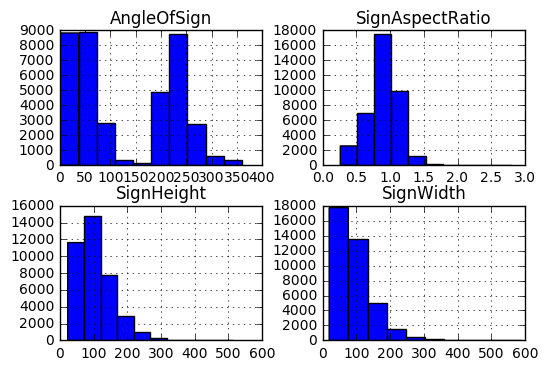

In [8]:
train.hist()

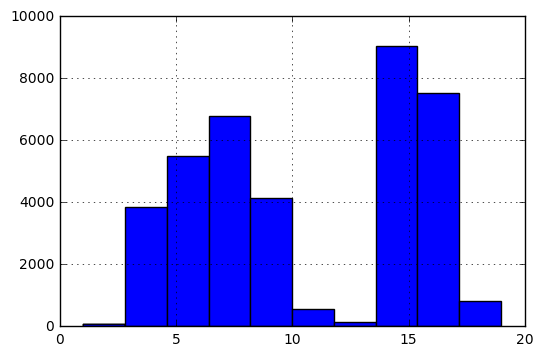

In [9]:
np.sqrt(train['AngleOfSign']).hist()

{'boxes': [<matplotlib.lines.Line2D at 0x127727f9a90>],
 'caps': [<matplotlib.lines.Line2D at 0x12772801da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1277280ccf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12772806e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x127727f9d30>,
  <matplotlib.lines.Line2D at 0x127727f9828>]}

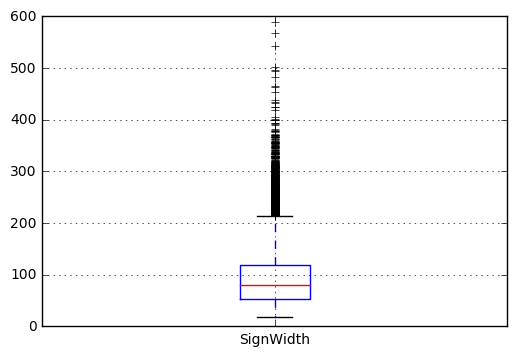

In [10]:
train.boxplot(column='SignWidth',return_type='dict')

In [11]:
le = LabelEncoder()

In [12]:
le.fit(train['DetectedCamera'])

LabelEncoder()

In [13]:
list(le.classes_)

['Front', 'Left', 'Rear', 'Right']

In [14]:
train['DetectedCamera'] = le.transform(train['DetectedCamera'])

In [15]:
train['SignFacing (Target)'].value_counts()

Front    21327
Rear     15662
Right      821
Left       675
Name: SignFacing (Target), dtype: int64

In [16]:
train['SignFacing (Target)'] = le.transform(train['SignFacing (Target)'])

In [17]:
train['SignFacing (Target)'].value_counts()

0    21327
2    15662
3      821
1      675
Name: SignFacing (Target), dtype: int64

In [18]:
train['DetectedCamera'].value_counts()

0    10910
3    10516
1     9298
2     7761
Name: DetectedCamera, dtype: int64

In [19]:
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
0,2c9180975a056a64015a1e0a52e57021,2,195,1.02,46,45,2
1,2c9180975a056a64015a1e17b32171e4,2,203,1.09,59,54,2
2,2c9180975a056a64015a1de4deb16bd5,0,26,0.96,104,108,0
3,2c9180975a056a64015a1de4deb16bdd,2,199,0.81,38,47,2
4,2c9180975a056a64015a1de4deb16bd6,2,208,0.93,54,58,2


In [20]:
test = pd.read_csv('test.csv')
test.info()
test['DetectedCamera'] = le.transform(test['DetectedCamera'])
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31485 entries, 0 to 31484
Data columns (total 6 columns):
Id                 31485 non-null object
DetectedCamera     31485 non-null object
AngleOfSign        31485 non-null int64
SignAspectRatio    31485 non-null float64
SignWidth          31485 non-null int64
SignHeight         31485 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight
0,2c9180975a056a64015a1e10d3f270fe,3,67,0.63,107,169
1,2c9180975a056a64015a1de4deb16bdc,0,16,0.88,61,69
2,2c9180975a056a64015a1e0e70ea70ce,3,44,1.15,232,202
3,2c9180975a056a64015a1dfed0c46ec6,3,50,1.10,137,125
4,2c9180975a056a64015a1dfed0c46ec7,0,30,0.95,99,104


In [21]:
from sklearn import preprocessing

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV

In [18]:
RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       max_features='auto',n_jobs=1, random_state=3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [19]:
train.columns

Index(['Id', 'DetectedCamera', 'AngleOfSign', 'SignAspectRatio', 'SignWidth',
       'SignHeight', 'SignFacing (Target)'],
      dtype='object')

In [56]:
features = ['AngleOfSign', 'SignAspectRatio','SignWidth']

In [57]:
X = train[features]

In [58]:
y = train['SignFacing (Target)']

In [25]:
param_test = {
    'max_depth':[5,10,15,20,25],
    'min_samples_split':[2,10,20,50,100]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=2,min_samples_split=2,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 10, 'min_samples_split': 20}, 0.96175055817339739)

In [27]:
param_test = {
    'max_depth':[8,9],
    'min_samples_split':[20,23,25,27,29,30]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=2,min_samples_split=2,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'max_depth': 9, 'min_samples_split': 30}, 0.96208836227347483)

In [28]:
param_test = {
    'min_samples_leaf':[1,2,5,10,15]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=9,min_samples_split=30,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'min_samples_leaf': 2}, 0.96208836903576034)

In [30]:
param_test = {
    'min_samples_leaf':[2,3,4]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=9,min_samples_split=30,
                                                          min_samples_leaf=1,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'min_samples_leaf': 2}, 0.96208836903576034)

In [40]:
param_test = {
    'n_estimators':[100,200,300,400,500,1000]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=9,min_samples_split=30,
                                                          min_samples_leaf=2,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 100}, 0.96208836903576034)

In [49]:
param_test = {
    'max_features':['auto','sqrt','log2',3]
}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=100, max_depth=9,min_samples_split=30,oob_score=True,
                                                           max_features='auto',min_samples_leaf=2,n_jobs=-1,random_state=111),
                        param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'max_features': 'auto'}, 0.96208836903576034)

In [50]:
rf = RandomForestClassifier(n_estimators=400, max_depth=9,min_samples_split=30,
                            min_samples_leaf=2,n_jobs=-1,random_state=111,oob_score=True)

In [51]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=True, random_state=111, verbose=0, warm_start=False)

In [36]:
rf.feature_importances_

array([ 0.20854025,  0.72676324,  0.02249029,  0.04220623])

In [52]:
prob = rf.predict_proba(test[features])

In [29]:
prob[0]

array([  9.96044074e-01,   3.87142389e-05,   2.02449039e-03,
         1.89272109e-03])

In [53]:
submission = pd.DataFrame(data=prob,index = test.Id,columns=['Front','Left','Rear','Right'])

In [47]:
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.997567,0.000016,0.000862,0.001555
2c9180975a056a64015a1de4deb16bdc,0.998782,0.000314,0.000026,0.000877
2c9180975a056a64015a1e0e70ea70ce,0.997346,0.000096,0.001446,0.001112
2c9180975a056a64015a1dfed0c46ec6,0.997921,0.000076,0.001067,0.000936
2c9180975a056a64015a1dfed0c46ec7,0.999109,0.000322,0.000068,0.000501


In [54]:
submission.to_csv('rfr.csv')
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.996912,0.000038,0.001223,0.001827
2c9180975a056a64015a1de4deb16bdc,0.998235,0.000426,0.000122,0.001216
2c9180975a056a64015a1e0e70ea70ce,0.996585,0.000119,0.001592,0.001705
2c9180975a056a64015a1dfed0c46ec6,0.997007,0.000083,0.001218,0.001691
2c9180975a056a64015a1dfed0c46ec7,0.998866,0.000391,0.000089,0.000654


In [32]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
DetectedCamera,NaN,NaN,NaN,NaN,NaN,NaN
AngleOfSign,NaN,NaN,NaN,NaN,NaN,NaN
SignAspectRatio,NaN,NaN,NaN,NaN,NaN,NaN
SignWidth,NaN,NaN,NaN,NaN,0.856428,NaN
SignHeight,NaN,NaN,NaN,0.856428,NaN,NaN
SignFacing (Target),NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [56]:
from xgboost.sklearn import XGBClassifier

In [30]:
standardized_X = preprocessing.scale(X)

In [29]:
param_test = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96217, std: 0.00926, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.96214, std: 0.00931, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.96222, std: 0.00922, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.96097, std: 0.00986, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.96084, std: 0.00956, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.96082, std: 0.00946, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.96019, std: 0.00858, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.96056, std: 0.00915, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.96053, std: 0.00922, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.95874, std: 0.00849, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.95905, std: 0.00878, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.95972, std: 0.00906, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [30]:
param_test = {
 'max_depth':[3,4],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96217, std: 0.00940, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.96222, std: 0.00922, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.96193, std: 0.00934, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.96159, std: 0.01004, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.96175, std: 0.00985, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.96165, std: 0.00978, params: {'max_depth': 4, 'min_child_weight': 6}],
 {'max_depth': 3, 'min_child_weight': 5},
 0.96221838768333223)

In [31]:
param_test = {
 'gamma':[i/100.0 for i in range(0,9)]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96222, std: 0.00922, params: {'gamma': 0.0},
  mean: 0.96206, std: 0.00926, params: {'gamma': 0.01},
  mean: 0.96211, std: 0.00927, params: {'gamma': 0.02},
  mean: 0.96217, std: 0.00937, params: {'gamma': 0.03},
  mean: 0.96219, std: 0.00930, params: {'gamma': 0.04},
  mean: 0.96214, std: 0.00930, params: {'gamma': 0.05},
  mean: 0.96217, std: 0.00931, params: {'gamma': 0.06},
  mean: 0.96209, std: 0.00929, params: {'gamma': 0.07},
  mean: 0.96201, std: 0.00934, params: {'gamma': 0.08}],
 {'gamma': 0.0},
 0.96221838768333223)

In [33]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96204, std: 0.00943, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.96180, std: 0.00949, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.96217, std: 0.00952, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.96209, std: 0.00977, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.96204, std: 0.00943, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.96180, std: 0.00949, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.96217, std: 0.00952, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.96209, std: 0.00977, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.96224, std: 0.00976, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.96175, std: 0.00929, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.96222, std: 0.00922, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.96206, std: 0.00947, params: {'subsample': 0.9, 'colsample_bytree'

In [34]:
param_test = {
 'subsample':[0.55,0.6,0.65],
 'colsample_bytree':[0.75,0.8,0.85]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96230, std: 0.00946, params: {'subsample': 0.55, 'colsample_bytree': 0.75},
  mean: 0.96204, std: 0.00943, params: {'subsample': 0.6, 'colsample_bytree': 0.75},
  mean: 0.96172, std: 0.00944, params: {'subsample': 0.65, 'colsample_bytree': 0.75},
  mean: 0.96196, std: 0.00946, params: {'subsample': 0.55, 'colsample_bytree': 0.8},
  mean: 0.96224, std: 0.00976, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.96211, std: 0.00944, params: {'subsample': 0.65, 'colsample_bytree': 0.8},
  mean: 0.96196, std: 0.00946, params: {'subsample': 0.55, 'colsample_bytree': 0.85},
  mean: 0.96224, std: 0.00976, params: {'subsample': 0.6, 'colsample_bytree': 0.85},
  mean: 0.96211, std: 0.00944, params: {'subsample': 0.65, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.75, 'subsample': 0.55},
 0.9622963772858929)

In [35]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.55, colsample_bytree=0.75,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96230, std: 0.00946, params: {'reg_alpha': 1e-05},
  mean: 0.96227, std: 0.00952, params: {'reg_alpha': 0.01},
  mean: 0.96230, std: 0.00943, params: {'reg_alpha': 0.1},
  mean: 0.96204, std: 0.00961, params: {'reg_alpha': 1},
  mean: 0.95775, std: 0.00715, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.1},
 0.96229643127894293)

In [36]:
param_test = {
 'reg_alpha':[0.01,0.0,0.1,0.15,0.2]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.55, colsample_bytree=0.75,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.96227, std: 0.00952, params: {'reg_alpha': 0.01},
  mean: 0.96230, std: 0.00946, params: {'reg_alpha': 0.0},
  mean: 0.96230, std: 0.00943, params: {'reg_alpha': 0.1},
  mean: 0.96224, std: 0.00957, params: {'reg_alpha': 0.15},
  mean: 0.96214, std: 0.00949, params: {'reg_alpha': 0.2}],
 {'reg_alpha': 0.1},
 0.96229643127894293)

In [34]:
xgb = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.55, colsample_bytree=0.75,reg_alpha=0.1,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

In [32]:
standardized_X

array([[ 0.45866277,  0.63309114,  0.52533145, -0.89550032],
       [ 0.45866277,  0.71468949,  0.83497637, -0.64740205],
       [-1.25492199, -1.090674  ,  0.25992151,  0.21139963],
       ..., 
       [ 0.45866277,  0.66369052,  0.34839149, -1.01000721],
       [ 0.45866277,  0.87788619,  0.08298155, -0.0748676 ],
       [-1.25492199, -0.99887586,  0.52533145,  0.82210304]])

In [40]:
standardized_Y = preprocessing.scale(test[features])

In [60]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_estimators=1000, nthread=4, objective='multi:softprob',
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.55)

In [61]:
probxgb = xgb.predict_proba(test[features])

In [42]:
probxgb

array([[  9.95012939e-01,   3.39243852e-04,   1.53041072e-03,
          3.11740092e-03],
       [  9.96909559e-01,   1.34016806e-03,   3.11769138e-04,
          1.43846520e-03],
       [  9.95700240e-01,   2.78403808e-04,   1.27328548e-03,
          2.74812966e-03],
       ..., 
       [  2.93234363e-03,   1.58470066e-03,   9.94782507e-01,
          7.00433040e-04],
       [  7.39154359e-03,   5.61395474e-03,   9.86346900e-01,
          6.47647481e-04],
       [  2.36084731e-03,   2.23386497e-03,   9.94495332e-01,
          9.09965136e-04]], dtype=float32)

In [62]:
xgb.feature_importances_

array([ 0.44866845,  0.30054709,  0.25078446], dtype=float32)

In [64]:
submission = pd.DataFrame(data=probxgb,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.to_csv('general.csv')
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.994498,0.000473,0.001917,0.003113
2c9180975a056a64015a1de4deb16bdc,0.996068,0.001363,0.001161,0.001408
2c9180975a056a64015a1e0e70ea70ce,0.995515,0.000395,0.000989,0.003101
2c9180975a056a64015a1dfed0c46ec6,0.992971,0.000482,0.002247,0.004300
2c9180975a056a64015a1dfed0c46ec7,0.997221,0.000595,0.000905,0.001279


In [54]:
xgb.feature_importances_

array([ 0.04918882,  0.3715913 ,  0.29470143,  0.28451848], dtype=float32)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
param_test={
    'n_neighbors':list(range(1,30,1))
}
gsearch = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30, p=2,n_jobs=-1),
                      param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'n_neighbors': 28}, 0.95465674601119999)

In [30]:
param_test={
    'weights':['uniform','distance']
}
gsearch = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=28, weights='uniform', leaf_size=30, p=2,n_jobs=-1),
                      param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'weights': 'uniform'}, 0.95465674601119999)

In [31]:
param_test={
    'leaf_size':[10,20,30,40,50,60]
}
gsearch = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=28, weights='uniform', leaf_size=30, p=2,n_jobs=-1),
                      param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'leaf_size': 20}, 0.95465674601119999)

In [32]:
param_test={
    'p':[1,2]
}
gsearch = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=28, weights='uniform', leaf_size=20, p=2,n_jobs=-1),
                      param_grid = param_test,n_jobs=4,iid=False, cv=10)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

({'p': 1}, 0.95520228838915267)

In [33]:
knn = KNeighborsClassifier(n_neighbors=28, weights='uniform', leaf_size=20, p=1,n_jobs=-1)

In [34]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=28, p=1,
           weights='uniform')

In [39]:
predknn = knn.predict_proba(test[features])

In [40]:
predknn

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.]])

In [42]:
submission = pd.DataFrame(data=predknn,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.to_csv('knn.csv')
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,1.0,0.0,0.0,0.0
2c9180975a056a64015a1de4deb16bdc,1.0,0.0,0.0,0.0
2c9180975a056a64015a1e0e70ea70ce,1.0,0.0,0.0,0.0
2c9180975a056a64015a1dfed0c46ec6,1.0,0.0,0.0,0.0
2c9180975a056a64015a1dfed0c46ec7,1.0,0.0,0.0,0.0


In [43]:
from sklearn.ensemble import VotingClassifier

In [51]:
clf1 = rf
clf2 = xgb
clf3 = knn

In [57]:
eclf = VotingClassifier(estimators=[('rf', clf1), ('xgb', clf2)], voting='soft')

In [58]:
eclf.fit(X,y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            ...ob', reg_alpha=0.1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.55))],
         voting='soft', weights=None)

In [59]:
predeclf = eclf.predict_proba(test[features])

In [60]:
submission = pd.DataFrame(data=predeclf,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.to_csv('eclf.csv')
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.997947,0.000052,0.001042,0.000958
2c9180975a056a64015a1de4deb16bdc,0.998773,0.000440,0.000070,0.000717
2c9180975a056a64015a1e0e70ea70ce,0.998218,0.000058,0.001068,0.000656
2c9180975a056a64015a1dfed0c46ec6,0.998304,0.000054,0.000894,0.000748
2c9180975a056a64015a1dfed0c46ec7,0.998821,0.000529,0.000103,0.000547


In [26]:
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
0,2c9180975a056a64015a1e0a52e57021,2,195,1.02,46,45,2
1,2c9180975a056a64015a1e17b32171e4,2,203,1.09,59,54,2
2,2c9180975a056a64015a1de4deb16bd5,0,26,0.96,104,108,0
3,2c9180975a056a64015a1de4deb16bdd,2,199,0.81,38,47,2
4,2c9180975a056a64015a1de4deb16bd6,2,208,0.93,54,58,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222012582E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000222016513C8>]], dtype=object)

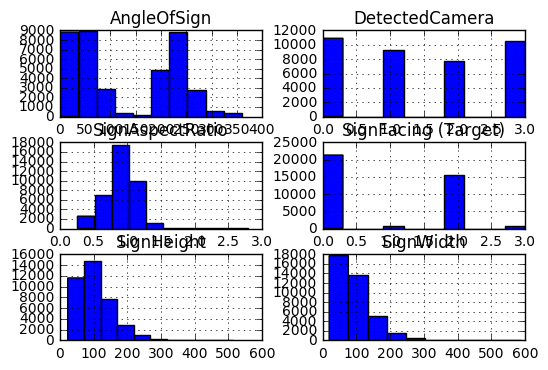

In [27]:
train.hist()

In [28]:
train.describe()

,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target)
count,38485.000000,38485.000000,38485.000000,38485.000000,38485.000000,38485.000000
mean,1.464675,132.930986,0.901241,92.922957,104.993140,0.895466
std,1.167159,98.042472,0.226068,52.399274,53.347424,1.017624
min,0.000000,1.000000,0.260000,19.000000,23.000000,0.000000
25%,0.000000,42.000000,0.770000,54.000000,65.000000,0.000000
50%,1.000000,80.000000,0.930000,80.000000,96.000000,0.000000
75%,3.000000,228.000000,1.040000,118.000000,132.000000,2.000000
max,3.000000,360.000000,2.790000,589.000000,513.000000,3.000000


In [24]:
train['ratio'] =train['SignHeight']/train['SignWidth']
test['ratio'] = test['SignHeight']/test['SignWidth']

In [25]:
train.corr()[((train.corr() < -0.85) | (train.corr() > 0.85)) & (train.corr() != 1)]

,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),ratio
DetectedCamera,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AngleOfSign,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SignAspectRatio,NaN,NaN,NaN,NaN,NaN,NaN,-0.923396
SignWidth,NaN,NaN,NaN,NaN,0.856428,NaN,NaN
SignHeight,NaN,NaN,NaN,0.856428,NaN,NaN,NaN
SignFacing (Target),NaN,NaN,NaN,NaN,NaN,NaN,NaN
ratio,NaN,NaN,-0.923396,NaN,NaN,NaN,NaN


In [26]:
train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),ratio
0,2c9180975a056a64015a1e0a52e57021,2,195,1.02,46,45,2,0.978261
1,2c9180975a056a64015a1e17b32171e4,2,203,1.09,59,54,2,0.915254
2,2c9180975a056a64015a1de4deb16bd5,0,26,0.96,104,108,0,1.038462
3,2c9180975a056a64015a1de4deb16bdd,2,199,0.81,38,47,2,1.236842
4,2c9180975a056a64015a1de4deb16bd6,2,208,0.93,54,58,2,1.074074


In [27]:
from sklearn.cross_validation import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train, train['SignFacing (Target)'], test_size=0.20, random_state=42)

In [29]:
X_train.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),ratio
14617,2c91808656c74c4e0157001b4cf154ea,1,253,0.41,28,69,2,2.464286
29678,2c9180885a812c3b015ab3d2d04217e4,2,232,1.04,51,49,2,0.960784
31492,2c91808e5bae20a1015bb715c8fa6677,0,36,0.85,242,286,0,1.181818
36508,2c9180ac593dcaee01593e4d067a0789,2,212,1.00,37,37,2,1.000000
18221,2c918086593dca31015962df4b0f6d4a,0,23,1.09,93,85,0,0.913978


In [30]:
y_train.head()

14617    2
29678    2
31492    0
36508    2
18221    0
Name: SignFacing (Target), dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x12772ead358>],
 'caps': [<matplotlib.lines.Line2D at 0x12772eb5cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x12772ebaef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12772eba6d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12772eadd68>,
  <matplotlib.lines.Line2D at 0x12772eadef0>]}

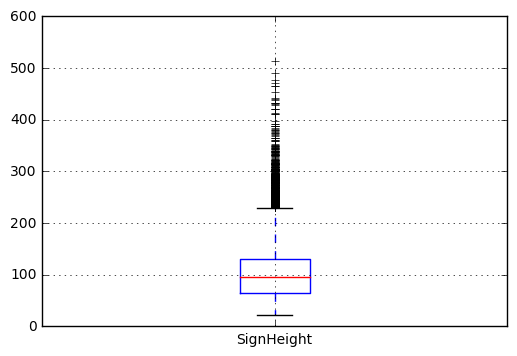

In [31]:
X_train.boxplot(column=['SignHeight'],return_type='dict')

In [32]:
(X_train['SignHeight']<=240).sum()

30084

In [70]:
df = X_train

{'boxes': [<matplotlib.lines.Line2D at 0x12772f28668>],
 'caps': [<matplotlib.lines.Line2D at 0x12773090ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1277309a8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x127730969e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12772f28f98>,
  <matplotlib.lines.Line2D at 0x127730907f0>]}

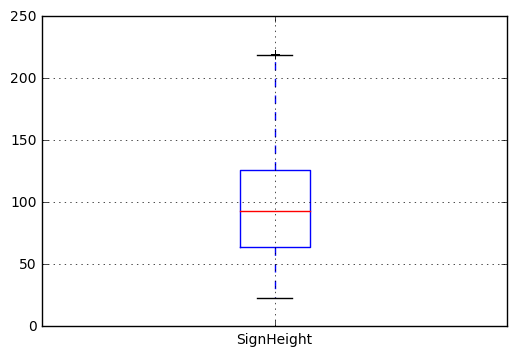

In [34]:
df.boxplot(column=['SignHeight'],return_type='dict')

In [35]:
df['height_bins'] = pd.cut(df.SignHeight,[0,60,125,250],labels=['low','average','high'])
df['height_bins']

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


14617    average
29678        low
36508        low
18221    average
10812        low
25686    average
22786       high
30983        low
5787     average
22140    average
24050       high
33813        low
30747    average
1060         low
27372       high
6956     average
11198       high
28150       high
22336    average
9588     average
6662     average
9252     average
21726        low
25504    average
28041       high
37612    average
8760         low
18198    average
3588     average
11661        low
          ...   
14502       high
30740    average
3890     average
3556        high
11394       high
31551    average
1267         low
1899         low
35773        low
19118    average
189         high
2747        high
18942    average
25658    average
6396     average
19769    average
17568       high
37819       high
5311     average
2433        high
769          low
1685     average
16023    average
21962       high
37194        low
16850    average
11284    average
38158        l

{'boxes': [<matplotlib.lines.Line2D at 0x12773326cf8>],
 'caps': [<matplotlib.lines.Line2D at 0x127733349b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1277333aba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1277333a390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1277332d940>,
  <matplotlib.lines.Line2D at 0x1277332dac8>]}

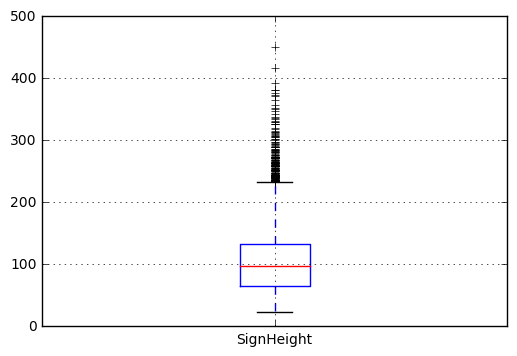

In [48]:
X_test.boxplot(column=['SignHeight'],return_type='dict')

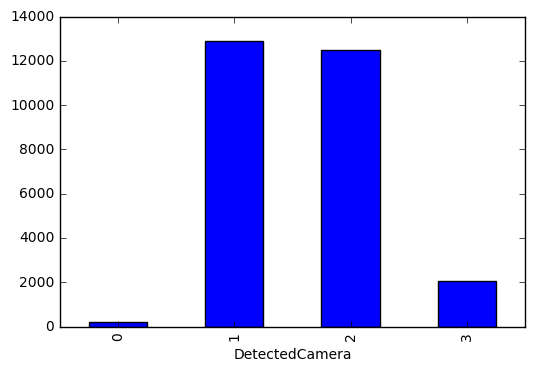

In [46]:
df.groupby('DetectedCamera')['SignFacing (Target)'].sum().plot.bar()

In [71]:
df.head()

,Id,DetectedCamera,AngleOfSign,SignAspectRatio,SignWidth,SignHeight,SignFacing (Target),ratio
14617,2c91808656c74c4e0157001b4cf154ea,1,253,0.41,28,69,2,2.464286
29678,2c9180885a812c3b015ab3d2d04217e4,2,232,1.04,51,49,2,0.960784
31492,2c91808e5bae20a1015bb715c8fa6677,0,36,0.85,242,286,0,1.181818
36508,2c9180ac593dcaee01593e4d067a0789,2,212,1.00,37,37,2,1.000000
18221,2c918086593dca31015962df4b0f6d4a,0,23,1.09,93,85,0,0.913978


In [72]:
len(df)

30788

In [73]:
xgb = XGBClassifier( learning_rate =0.01, n_estimators=1000, max_depth=3,
min_child_weight=5, gamma=0, subsample=0.55, colsample_bytree=0.75,reg_alpha=0.1,
objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

In [74]:
features = ['DetectedCamera','AngleOfSign','ratio','SignHeight']

In [75]:
X = df[features]
y = df['SignFacing (Target)']

In [76]:
xgb.fit(X,y)
probxgb = xgb.predict_proba(test[features])
submission = pd.DataFrame(data=probxgb,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.993271,0.000436,0.001943,0.004350
2c9180975a056a64015a1de4deb16bdc,0.995818,0.002163,0.000362,0.001657
2c9180975a056a64015a1e0e70ea70ce,0.995786,0.000299,0.001294,0.002621
2c9180975a056a64015a1dfed0c46ec6,0.995386,0.000318,0.001406,0.002890
2c9180975a056a64015a1dfed0c46ec7,0.998016,0.000603,0.000262,0.001119


In [77]:
xgb.feature_importances_

array([ 0.11503743,  0.43268448,  0.26057753,  0.19170053], dtype=float32)

In [78]:
testpred = xgb.predict(X_test[features])

In [79]:
metrics.accuracy_score(testpred,y_test)

0.96154345849032086

In [85]:
submission.to_csv('f5.csv')

In [84]:
rf = RandomForestClassifier(n_estimators=400, max_depth=9,min_samples_split=30,
                            min_samples_leaf=2,n_jobs=-1,random_state=111,oob_score=True)
rf.fit(train[features],train['SignFacing (Target)'])
probrf = rf.predict_proba(test[features])
submission = pd.DataFrame(data=probrf,index = test.Id,columns=['Front','Left','Rear','Right'])
submission.head()

,Front,Left,Rear,Right
Id,,,,
2c9180975a056a64015a1e10d3f270fe,0.996058,0.000071,0.001740,0.002131
2c9180975a056a64015a1de4deb16bdc,0.997450,0.000605,0.000045,0.001899
2c9180975a056a64015a1e0e70ea70ce,0.996267,0.000106,0.001531,0.002095
2c9180975a056a64015a1dfed0c46ec6,0.996931,0.000098,0.001209,0.001762
2c9180975a056a64015a1dfed0c46ec7,0.998544,0.000447,0.000140,0.000868
